In [1]:
import pandas as pd
import numpy as np
from fredapi import Fred
fred = Fred(api_key='32cc4243ebbaed5bafa9edee3b5bc4b5')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sp500 = pd.read_csv('SP500.csv', parse_dates=['DATE'], index_col='DATE')
gdp = pd.read_csv('GDPC1.csv', parse_dates=['DATE'], index_col='DATE')
two_ten = pd.read_csv('10-2.csv', parse_dates=['DATE'], index_col='DATE')


sp500.replace('.', np.nan, inplace=True)
sp500.dropna(axis=0, inplace=True)

gdp.replace('.', np.nan, inplace=True)
gdp.dropna(axis=0, inplace=True)

two_ten.replace('.', np.nan, inplace=True)
two_ten.dropna(axis=0, inplace=True)

In [3]:
data = pd.DataFrame(index=pd.date_range('1977-01-31', '2023-02-17'))
data['sp500'] = np.nan
data['gdp'] = np.nan
data['2-10'] = np.nan

In [4]:
for i in range(len(sp500)):
    # con questo prendiamo la posizione poi dobbiamo assegnarlo
    data.iloc[data.index.get_loc(sp500.index[i]),0] = sp500.iloc[i,0]

for i in range(len(gdp)):
    data.iloc[data.index.get_loc(gdp.index[i]),1] = gdp.iloc[i,0]

for i in range(len(two_ten)):
    data.iloc[data.index.get_loc(two_ten.index[i]),2] = two_ten.iloc[i,2]


In [5]:
if 0 in sp500:
    print('y')
    

In [6]:
data['sp500'].fillna(method='ffill', inplace=True)
data['gdp'].fillna(method='ffill', inplace=True)
data['2-10'].fillna(method='ffill', inplace=True)

In [7]:
data['sp500'] = pd.DataFrame(np.log(data['sp500']/data['sp500'].shift(+1)))

e:\code\10_2_curve\.venv\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
data

,sp500,gdp,2-10
1977-01-31,NaN,NaN,NaN
1977-02-01,0.004986,NaN,-0.008278
1977-02-02,-0.001757,NaN,-0.016765
1977-02-03,-0.004995,NaN,0.049474
1977-02-04,0.000295,NaN,0.000000
...,...,...,...
2023-02-13,0.011384,20198.091,0.046287
2023-02-14,-0.000280,20198.091,0.063927
2023-02-15,0.002769,20198.091,-0.054195
2023-02-16,-0.013885,20198.091,-0.059868


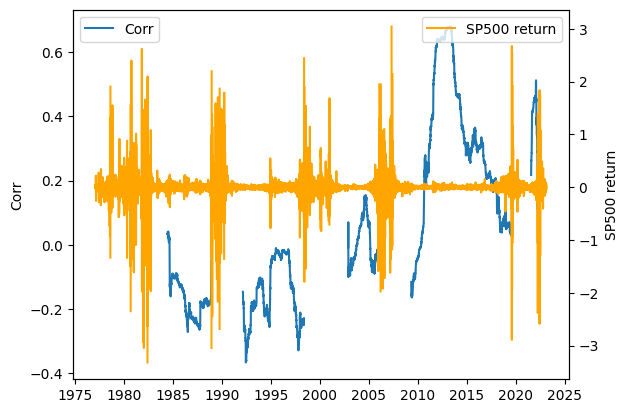

In [9]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(data['sp500'].rolling(700).corr(data['2-10'])) 
ax1.set_ylabel('Corr')
ax1.legend(['Corr'], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.plot(data['2-10'], color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('SP500 return')
ax2.legend(['SP500 return'], loc="upper right")
plt.show()

In [10]:
data

,sp500,gdp,2-10
1977-01-31,NaN,NaN,NaN
1977-02-01,0.004986,NaN,-0.008278
1977-02-02,-0.001757,NaN,-0.016765
1977-02-03,-0.004995,NaN,0.049474
1977-02-04,0.000295,NaN,0.000000
...,...,...,...
2023-02-13,0.011384,20198.091,0.046287
2023-02-14,-0.000280,20198.091,0.063927
2023-02-15,0.002769,20198.091,-0.054195
2023-02-16,-0.013885,20198.091,-0.059868


In [11]:
data.loc['1980-03-20':'1980-09-20'].corr()


,sp500,gdp,2-10
sp500,1.000000,-0.099554,-0.010870
gdp,-0.099554,1.000000,0.019806
2-10,-0.010870,0.019806,1.000000


In [12]:
correl = pd.DataFrame(
    {
        'SP500 6m': [
            data.loc['1980-03-20':'1980-09-20'].corr().iloc[0,2],          
            data.loc['1981-05-21':'1981-11-21'].corr().iloc[0,2],
            data.loc['1989-03-30':'1989-09-30'].corr().iloc[0,2],
            data.loc['2000-04-09':'2000-10-09'].corr().iloc[0,2],
            data.loc['2006-11-16':'2007-05-09'].corr().iloc[0,2],
            data.loc['2019-08-27':'2020-02-27'].corr().iloc[0,2]
        ],
        'SP500 1y': [
            data.loc['1980-03-20':'1981-03-20'].corr().iloc[0,2],          
            data.loc['1981-05-21':'1982-05-21'].corr().iloc[0,2],
            data.loc['1989-03-30':'1990-03-30'].corr().iloc[0,2],
            data.loc['2000-04-09':'2001-04-09'].corr().iloc[0,2],
            data.loc['2006-11-16':'2007-11-09'].corr().iloc[0,2],
            data.loc['2019-08-27':'2020-06-27'].corr().iloc[0,2]
        ]
    }, index= ('1980-03-20','1981-05-21','1989-03-30','2000-04-09','2006-11-16','2019-08-27')
)


correl.append(pd.DataFrame(correl.mean(), columns=['Average']).T, ignore_index=False)

C:\Users\SUH3221\AppData\Local\Temp\1\ipykernel_2564\4201262313.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correl.append(pd.DataFrame(correl.mean(), columns=['Average']).T, ignore_index=False)


,SP500 6m,SP500 1y
1980-03-20,-0.010870,-0.049553
1981-05-21,0.147642,0.156056
1989-03-30,-0.055449,-0.190672
2000-04-09,0.050505,-0.022867
2006-11-16,0.308832,0.009373
2019-08-27,0.014990,0.171862
Average,0.075942,0.012366


In [13]:
pd.DataFrame((data.loc['1978-08-18':'1980-05-01'].corr().iloc[:2,2]))


,2-10
sp500,0.018892
gdp,-0.019592


In [14]:
pd.DataFrame((data.loc['1980-05-01':'1981-05-01'].corr().iloc[:2,2]))

,2-10
sp500,-0.047645
gdp,-0.006999
